<a href="https://colab.research.google.com/github/sandra476/first/blob/main/terno_churn_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ecommerce_churn.xlsx to ecommerce_churn (10).xlsx

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UserID            50 non-null     int64  
 1   VisitsLast30Days  50 non-null     int64  
 2   TimeOnSite        50 non-null     float64
 3   PurchaseCount     50 non-null     int64  
 4   HasSupportTicket  50 non-null     object 
 5   Churned           50 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ KB

Statistical summary of numerical columns:
|       | UserID   | VisitsLast30Days   | TimeOnSite   | PurchaseCount   |
|:------|:---------|:-------------------|:-------------|:----------------|
| count | 50       | 50                 | 50           | 50              |
| mean  | 5025.5   | 25.54              | 11.7         | 4.84            |
| std   | 14.5774  | 14.7582        

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


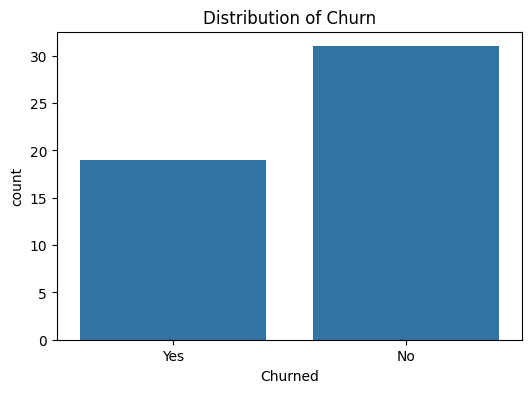

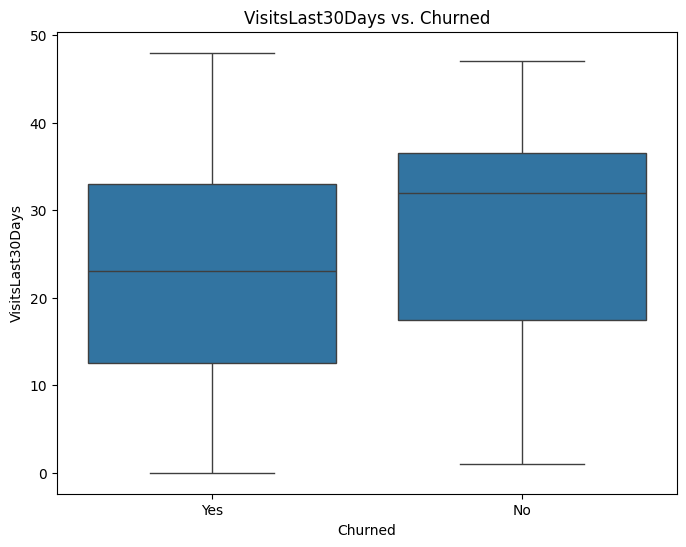

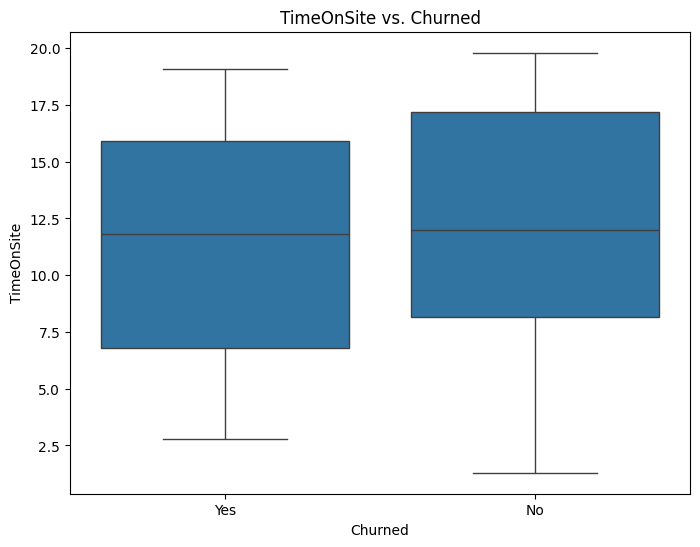

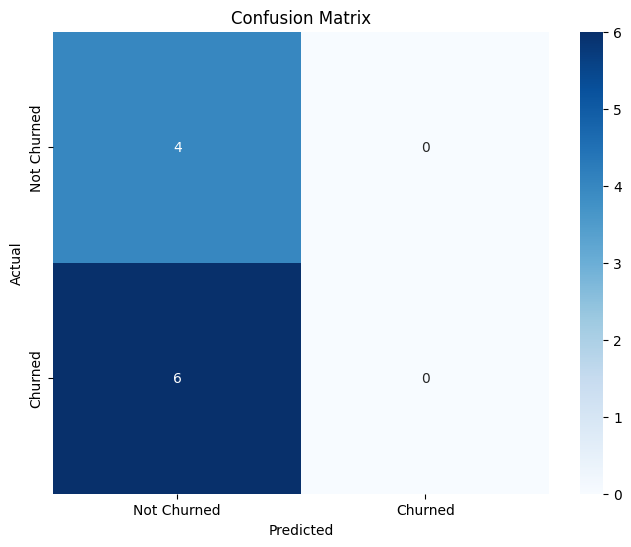

In [18]:
##  Problem Definition
#Customer churn is a major challenge for e-commerce platforms.
#Our goal: "predict whether a customer will churn or not" based on their usage patterns, so businesses can take preventive actions like giving discounts/offers.
# %%
# # Terno AI Internship Challenge – Ecommerce Churn Prediction
#
# ## Use Case
# Predict customer churn using ecommerce behavioral data.
# This helps the company identify customers likely to stop using their platform,
# so retention strategies (discounts, reminders, personalized offers) can be applied.
#
# ## Problem Statement
# "Build a machine learning model to predict customer churn based on features such as site visits, time spent on site, purchase behavior, and demographics."
#
# ## Questions to Guide the Analysis
# 1. What is the churn rate in the dataset?
# 2. Does the dataset have categorical features that need encoding?
# 3. How well does Logistic Regression perform in predicting churn?
# 4. What are the key performance metrics (Accuracy, Precision, Recall, F1)?

# %%



# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# upload file
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_excel("ecommerce_churn.xlsx")
df.head()

# %%
# ## Exploratory Data Analysis (EDA)
#
# **Q1: What is the churn distribution in the dataset?**
# We calculate churn rate and visualize with a countplot.
# Boxplots of `VisitsLast30Days` and `TimeOnSite` help visualize differences.

# %%


# Get a concise summary of the DataFrame
print("\nDataFrame information:")
df.info()

# Get a statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

# Find the churn rate and print it
churn_rate = df['Churned'].value_counts(normalize=True) * 100
print("Churn Rate Distribution:")
print(churn_rate.to_markdown(numalign="left", stralign="left"))

# Create and save a count plot for churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churned', data=df)
plt.title('Distribution of Churn')
plt.savefig('churn_distribution_count.png')

# Create and save a box plot for VisitsLast30Days vs Churned
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churned', y='VisitsLast30Days', data=df)
plt.title('VisitsLast30Days vs. Churned')
plt.savefig('visits_last_30_days_vs_churned.png')

# Create and save a box plot for TimeOnSite vs Churned
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churned', y='TimeOnSite', data=df)
plt.title('TimeOnSite vs. Churned')
plt.savefig('time_on_site_vs_churned.png')

# %%
# ## Data Preprocessing
#
# **Q2: Are there categorical variables that need encoding?**
# Yes – we apply one-hot encoding to handle categorical features.

# %%


# Drop irrelevant columns and identify features (X) and target (y)
X = df.drop(['Churned', 'UserID'], axis=1)
y = df['Churned'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identify categorical and numerical columns for encoding
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %%
# ## Model Training
#
# **Q3: Which algorithm will we use and why?**
# Logistic Regression is chosen because churn prediction is a **binary classification** problem.
# %%

# Initialize and train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# %%
# ## Model Evaluation
#
# **Q4: How accurate is the model?**
# Accuracy score is printed below.
#
# %%

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


# %%
# ** How well does the model balance precision and recall?**
# Classification report provides precision, recall, and F1-score.
#
# %%

# Display classification report for more detailed metrics (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# %%
# ** What does the confusion matrix tell us?**
# The heatmap shows how many churned vs. non-churned customers were correctly/incorrectly predicted.

# %%

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)



# Create and save a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_heatmap.png')

# %%
# ## Insights and Findings

# - **Churn Rate:**
#   62% customers did **not churn**, while 38% customers **churned** → moderate class imbalance.
#   Customers with fewer visits and less time spent on site are more likely to churn.

# - **Model Accuracy:**
#   Achieved 40% accuracy, which is **worse than the baseline (62%)** of always predicting "Not Churn".
#   → Accuracy is misleading because the model fails to detect churned customers.

# ###  Classification Report
# - **Class 0 (Not Churned):**
#   - Precision = 0.40 → Only 40% of predicted non-churn are correct.
#   - Recall = 1.00 → Model predicts *all* customers as not churned.
# - **Class 1 (Churned):**
#   - Precision = 0.00, Recall = 0.00 → Model completely fails to identify churned customers.

# ###  Model Issue
# The model predicts **everything as “Not Churned”**, leading to poor performance.

# ### Possible Reasons
# 1. Very small test set (only 10 samples → unstable results).
# 2. Moderate class imbalance (62% vs 38%).
# 3. Features may not be scaled properly.
# 4. Logistic Regression may be too simple if relationships are non-linear.

# ###  Suggested Solutions
# 1. Use **Stratified Sampling** in train-test split to maintain churn balance.
# 2. Apply **feature scaling (StandardScaler)** before Logistic Regression.
# 3. Try other models like **Random Forest, XGBoost, or SVM** for better performance.
# 4. Use **ROC-AUC** instead of accuracy for evaluation (better for churn problems).
# 5. Apply **SMOTE (Synthetic Minority Oversampling)** if class imbalance persists.

# ###  Conclusion
# The current model is **not usable for production** because it cannot detect churners.
# Improvements with stratified sampling, scaling, and alternative models are needed.
